In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import sys
from scipy.stats import uniform, norm
from sklearn.linear_model import LinearRegression
sys.path.insert(0,'..')

from BMR.bmr import *

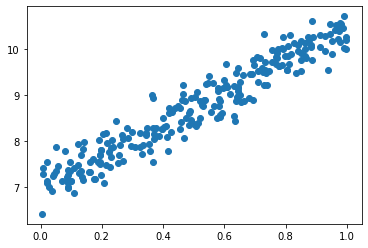

In [2]:
# generate data
n = 250
X = uniform().rvs((n,1))
# create model
y = 3.5*X + 7
# add noise
y += norm(loc=0, scale=0.3).rvs((n,1))
# plot it
plt.plot(X, y, 'o')

In [3]:
# fit standard linear regression
lr = LinearRegression()
lr.fit(X, y)

# build BMR model and fit it
bmr = BMR(epsilon=0.2, min_n_pts=5, M=10)
bmr.fit(X, y)

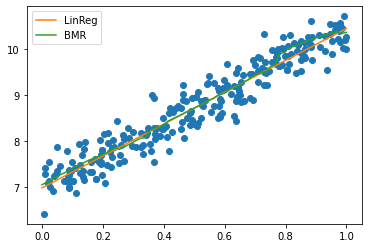

In [4]:
# make predictions and plot
x_pred = np.linspace(0, 1, 100).reshape(-1, 1)
y_pred_lr = lr.predict(x_pred)
y_pred_bmr = bmr.predict(x_pred)

plt.plot(X, y, 'o')
plt.plot(x_pred, y_pred_lr, '-', label='LinReg')
plt.plot(x_pred, y_pred_bmr, '-', label='BMR')
plt.legend()

In [5]:
# inspect coefficients at given points
x_coeff = [0.0, 0.5, 1.0]
beta, intercept = bmr.coefficients(x_coeff)
print(f'beta={beta}')
print(f'intercept={intercept}')

beta=[[3.63020029]
 [3.4757846 ]
 [1.47114816]]
intercept=[7.05907796 6.98261803 8.8979862 ]


In [6]:
# linear regression coefficiants
print(f'beta={lr.coef_}')
print(f'intercept={lr.intercept_}')

beta=[[3.46030491]]
intercept=[6.99211728]
